# Exploratry Data Analysis of Crop Production in India

Import necessary libs

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Load the dataset

In [3]:
cpd = pd.read_csv("assets/cleaned_dataset.csv")

Correlation Matrix

Correlation Matrix:
            Crop_Year      Area  Production
Crop_Year    1.000000 -0.054531   -0.007464
Area        -0.054531  1.000000    0.601003
Production  -0.007464  0.601003    1.000000


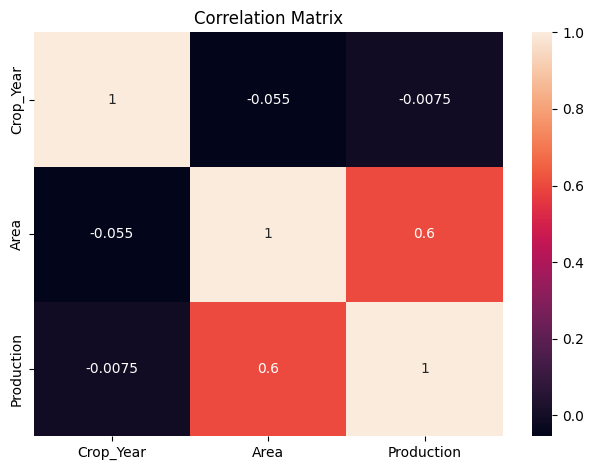

In [4]:
correlation_matrix = cpd[cpd.select_dtypes(include=[np.number]).columns].corr()

print(f"Correlation Matrix:\n{correlation_matrix}")

sb.heatmap(
    correlation_matrix,
    annot=True,
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

State Wise Crop Production

                     State_Name   Production
30                Uttar Pradesh  39824599.70
14                    Karnataka  26136371.34
16               Madhya Pradesh  24897513.66
4                         Bihar  24400435.66
3                         Assam  20200905.00
27                   Tamil Nadu  16241994.93
1                Andhra Pradesh  15821781.00
9                       Gujarat  15242806.00
22                       Odisha  13735735.50
17                  Maharashtra  13600030.20
32                  West Bengal  11111882.10
25                    Rajasthan  10546964.50
28                    Telangana   7820874.00
15                       Kerala   7075987.30
6                  Chhattisgarh   6951553.01
10                      Haryana   6376619.00
31                  Uttarakhand   6147436.00
21                     Nagaland   5765300.00
19                    Meghalaya   5030867.00
2             Arunachal Pradesh   4857568.61
24                       Punjab   4109001.00
13        

C:\Users\HP\AppData\Local\Temp\ipykernel_14252\1777319275.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


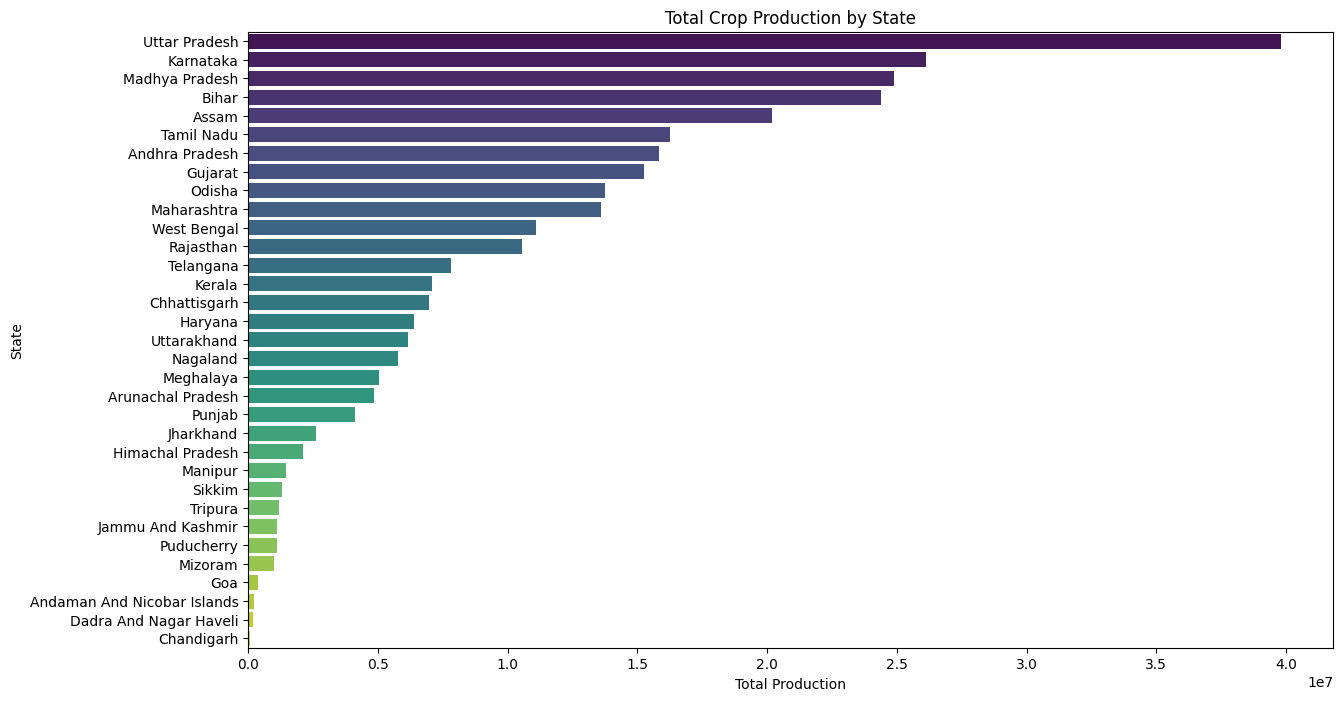

In [5]:
statewise_production = (
    cpd.groupby("State_Name")["Production"]
    .sum()
    .reset_index()
    .sort_values(
        by="Production",
        ascending=False,
    )
)

print(statewise_production)

plt.figure(figsize=(14, 8))
sb.barplot(
    data=statewise_production,
    x="Production",
    y="State_Name",
    palette="viridis",
)
plt.title("Total Crop Production by State")
plt.xlabel("Total Production")
plt.ylabel("State")
plt.show()

Season Wise Crop Production

       Season    Production
0      Autumn  9.494058e+06
1      Kharif  1.044414e+08
2        Rabi  7.900847e+07
3      Summer  2.141904e+07
4  Whole Year  7.912279e+07
5      Winter  5.109322e+06


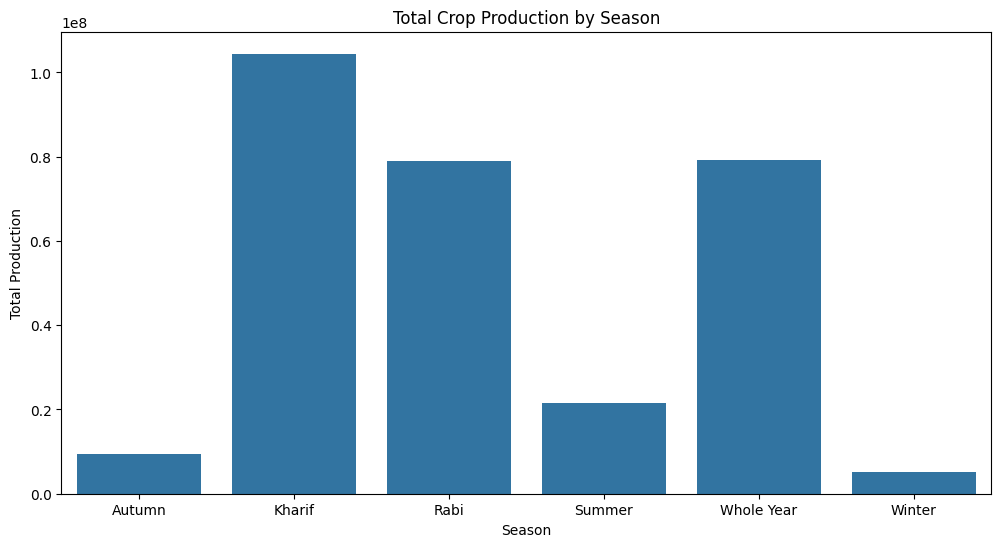

In [6]:
seasonal_production = cpd.groupby("Season")["Production"].sum().reset_index()

print(seasonal_production)

plt.figure(figsize=(12, 6))
sb.barplot(
    data=seasonal_production,
    x="Season",
    y="Production",
)
plt.title("Total Crop Production by Season")
plt.xlabel("Season")
plt.ylabel("Total Production")
plt.show()

Storing Crops & Years in Veriables

In [7]:
crops = cpd["Crop"].unique()
years = cpd["Crop_Year"].unique()

Top 10 Crops Production

In [8]:

total_production_by_crop = cpd.groupby("Crop")["Production"].sum().reset_index()
top_10_crops = (
    total_production_by_crop.sort_values(by="Production", ascending=False)
    .head(10)["Crop"]
    .values
)

print(total_production_by_crop)
print(top_10_crops)

total_production_by_year = cpd.groupby("Crop_Year")["Production"].sum().reset_index()
top_10_years = (
    total_production_by_year.sort_values(by="Production", ascending=False)
    .head(10)["Crop_Year"]
    .values
)

print(total_production_by_year)
print(top_10_years)

                    Crop  Production
0                  Apple        0.00
1    Arcanut (Processed)    19465.00
2               Arecanut  2972916.59
3              Arhar/Tur  9498057.33
4              Ash Gourd        0.00
..                   ...         ...
119                 Urad  7012372.86
120               Varagu    49694.00
121          Water Melon        0.00
122                Wheat  6017789.80
123                  Yam        0.00

[124 rows x 2 columns]
['Maize' 'Rice' 'Potato' 'Onion' 'Sugarcane' 'Groundnut' 'Jowar' 'Barley'
 'Rapeseed &Mustard' 'Arhar/Tur']
    Crop_Year   Production
0        1997  11849386.00
1        1998  14382018.00
2        1999  16593607.70
3        2000  16399245.30
4        2001  16002265.17
5        2002  18761772.07
6        2003  20724493.63
7        2004  16776767.05
8        2005  16713486.24
9        2006  16762369.49
10       2007  16828454.88
11       2008  17401730.32
12       2009  16403659.69
13       2010  17143278.37
14       2011  1748

                  Crop   Production
59               Maize  29625129.27
98                Rice  23707293.76
90              Potato  17734869.07
67               Onion  17643300.20
109          Sugarcane  14997081.21
43           Groundnut  14333370.60
48               Jowar  10438703.10
8               Barley  10230065.92
95   Rapeseed &Mustard  10044790.42
3            Arhar/Tur   9498057.33


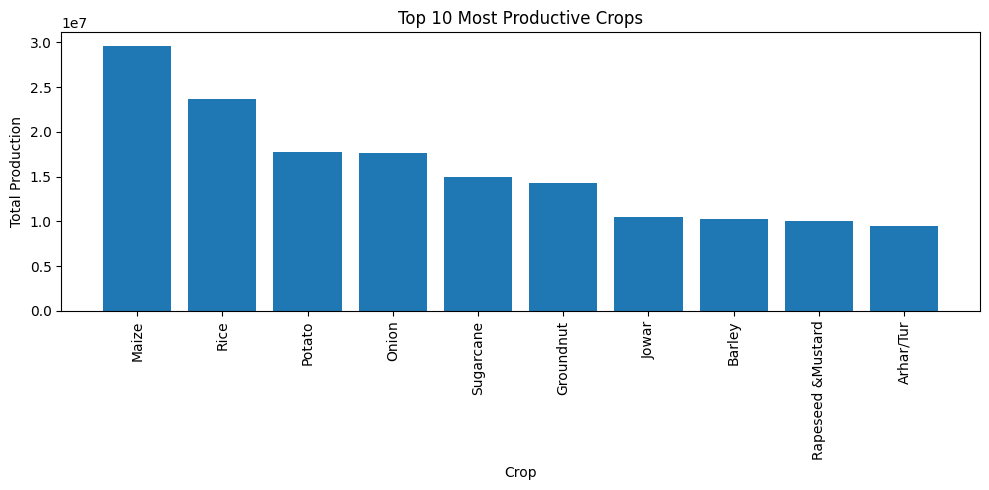

In [9]:
t10c = total_production_by_crop.sort_values(
    by="Production",
    ascending=False,
).head(10)

print(t10c)

plt.figure(figsize=(10, 5))
plt.bar(
    t10c["Crop"],
    t10c["Production"],
)
plt.title("Top 10 Most Productive Crops")
plt.xlabel("Crop")
plt.ylabel("Total Production")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Crop Wise Production

                  Crop   Production
59               Maize  29625129.27
98                Rice  23707293.76
90              Potato  17734869.07
67               Onion  17643300.20
109          Sugarcane  14997081.21
43           Groundnut  14333370.60
48               Jowar  10438703.10
8               Barley  10230065.92
95   Rapeseed &Mustard  10044790.42
3            Arhar/Tur   9498057.33


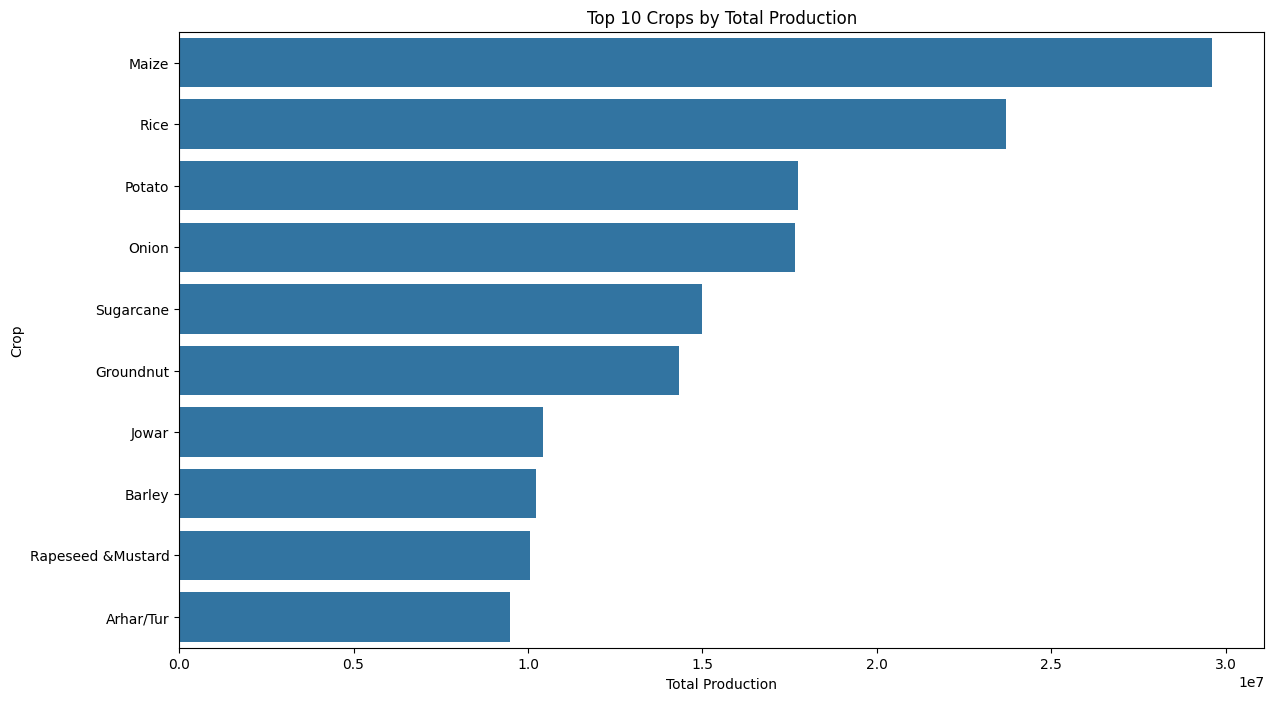

In [10]:
cropwise_production = (
    cpd.groupby("Crop")["Production"]
    .sum()
    .reset_index()
    .sort_values(
        by="Production",
        ascending=False,
    )
    .head(10)
)

print(cropwise_production)

plt.figure(figsize=(14, 8))
sb.barplot(
    data=cropwise_production,
    x="Production",
    y="Crop",
)
plt.title("Top 10 Crops by Total Production")
plt.xlabel("Total Production")
plt.ylabel("Crop")
plt.show()

State Wise Production

                     State_Name   Production
30                Uttar Pradesh  39824599.70
14                    Karnataka  26136371.34
16               Madhya Pradesh  24897513.66
4                         Bihar  24400435.66
3                         Assam  20200905.00
27                   Tamil Nadu  16241994.93
1                Andhra Pradesh  15821781.00
9                       Gujarat  15242806.00
22                       Odisha  13735735.50
17                  Maharashtra  13600030.20
32                  West Bengal  11111882.10
25                    Rajasthan  10546964.50
28                    Telangana   7820874.00
15                       Kerala   7075987.30
6                  Chhattisgarh   6951553.01
10                      Haryana   6376619.00
31                  Uttarakhand   6147436.00
21                     Nagaland   5765300.00
19                    Meghalaya   5030867.00
2             Arunachal Pradesh   4857568.61
24                       Punjab   4109001.00
13        

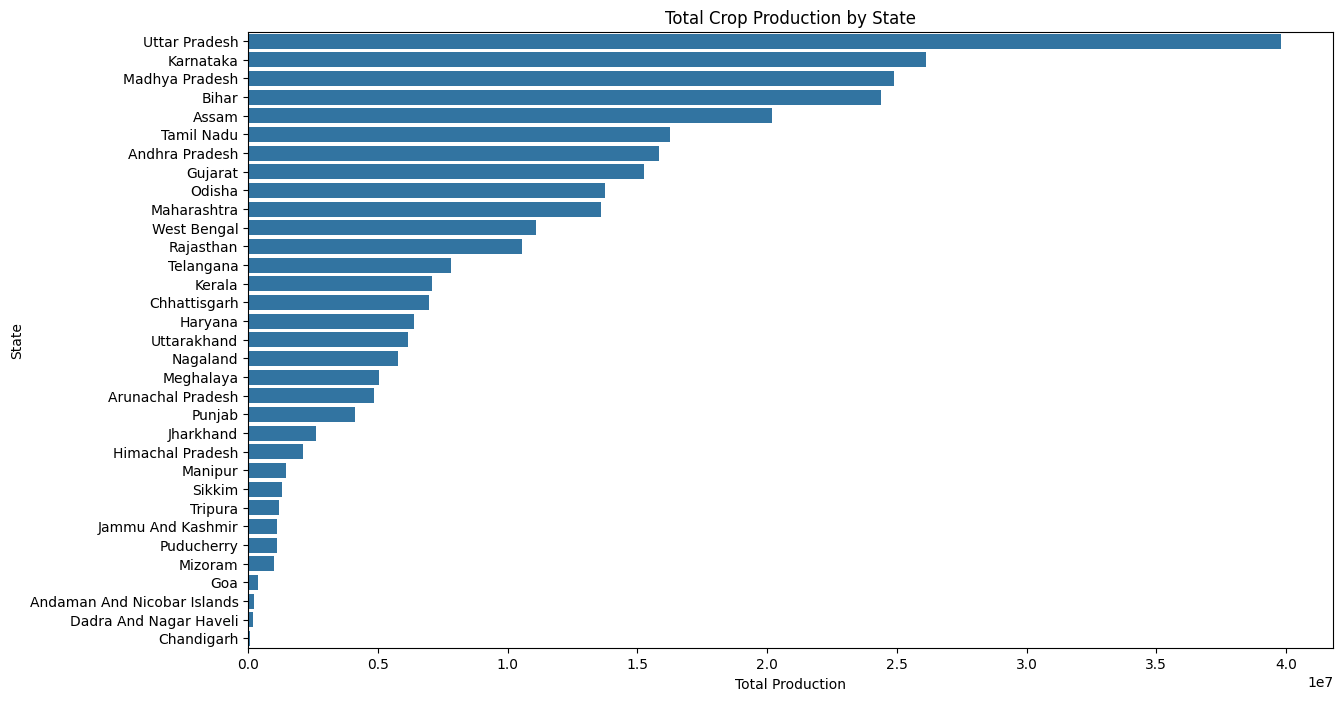

In [11]:
statewise_production = (
    cpd.groupby("State_Name")["Production"]
    .sum()
    .reset_index()
    .sort_values(
        by="Production",
        ascending=False,
    )
)

print(statewise_production)

plt.figure(figsize=(14, 8))
sb.barplot(
    data=statewise_production,
    x="Production",
    y="State_Name",
)
plt.title("Total Crop Production by State")
plt.xlabel("Total Production")
plt.ylabel("State")
plt.show()

State Wise Production in a Pie Chart

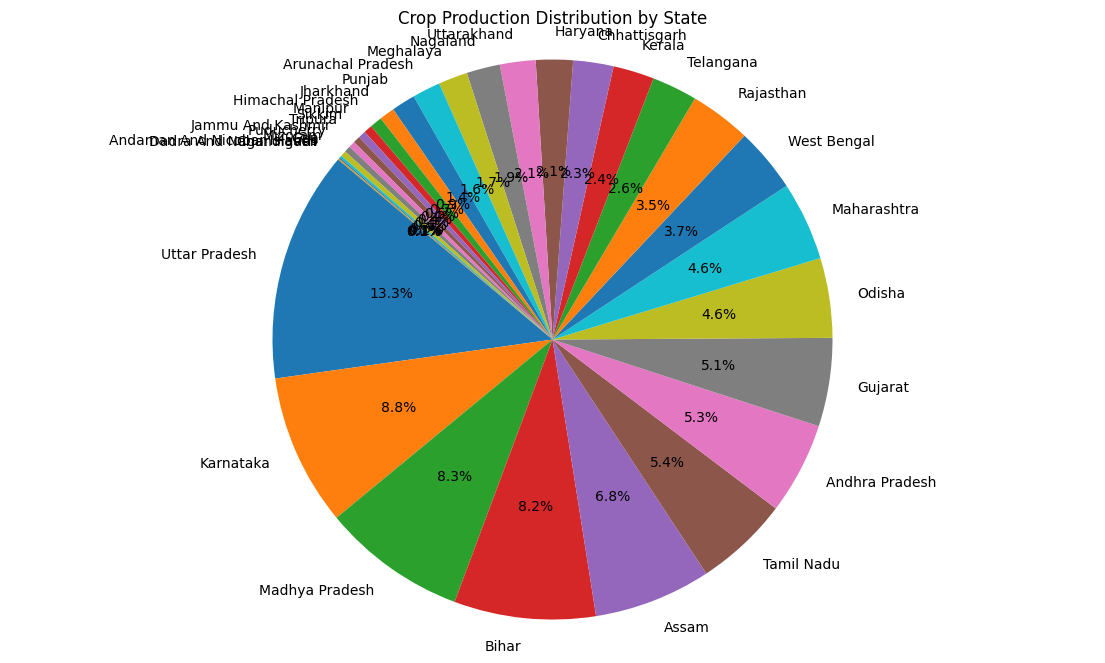

In [12]:
plt.figure(figsize=(14, 8))
plt.pie(
    statewise_production["Production"],
    labels=statewise_production["State_Name"],
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Crop Production Distribution by State")
plt.axis("equal")
plt.show()

Future Predictions of Top 10 Crops

Displayng plot: For Maize
Predictions: [2868.40194508 2870.89558231 2873.38921954]


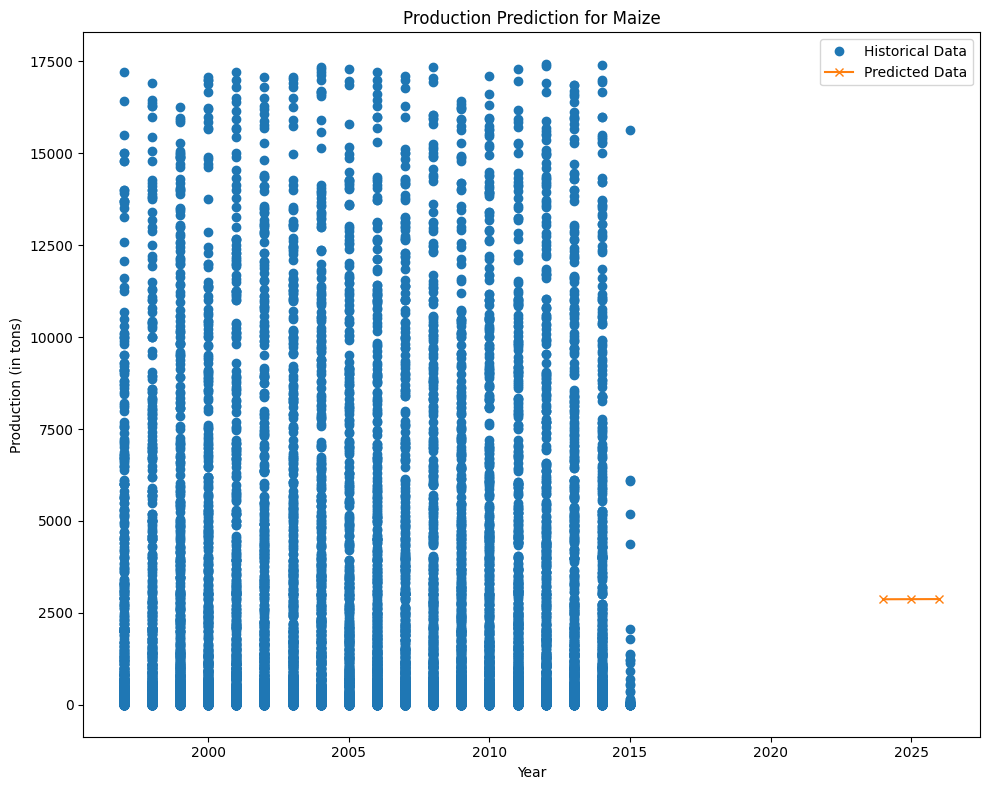

Displayng plot: For Rice
Predictions: [4521.55625035 4537.53123661 4553.50622288]


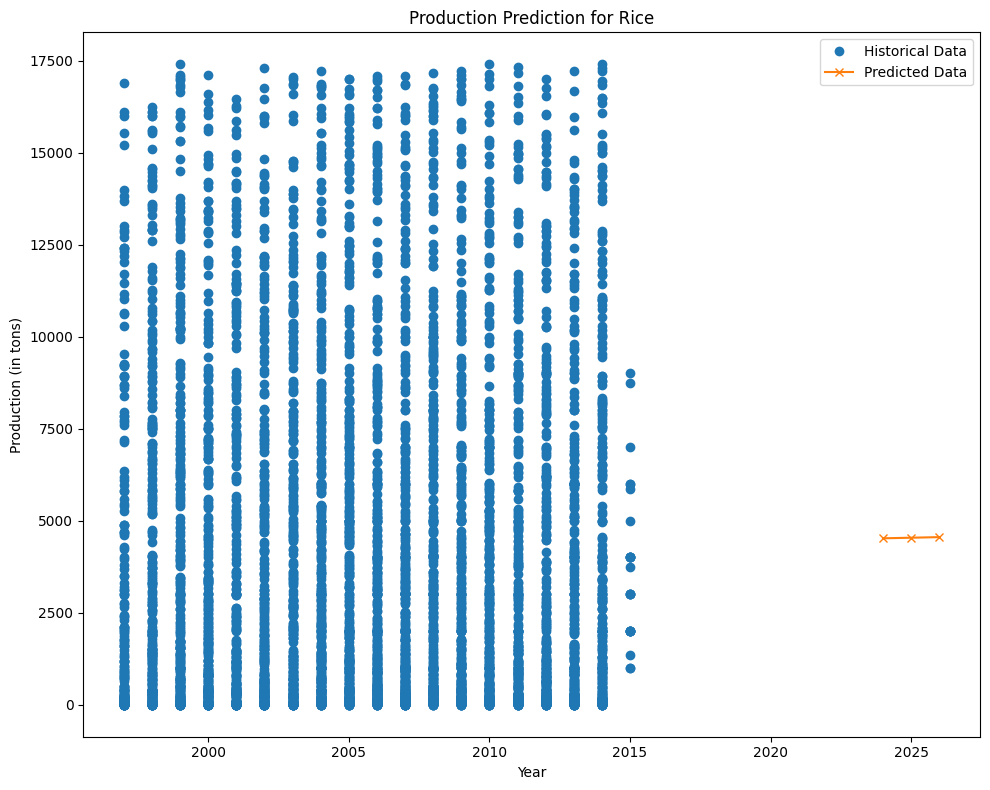

Displayng plot: For Potato
Predictions: [3077.81247847 3028.97323433 2980.13399019]


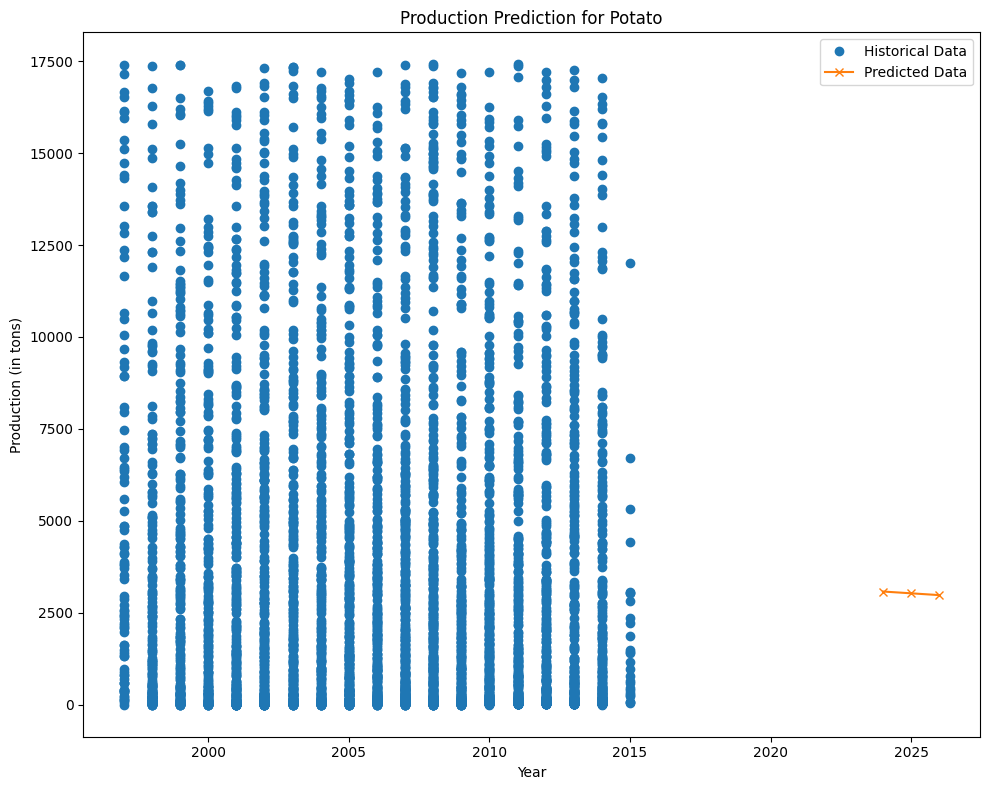

Displayng plot: For Onion
Predictions: [1697.02042097 1632.9441819  1568.86794282]


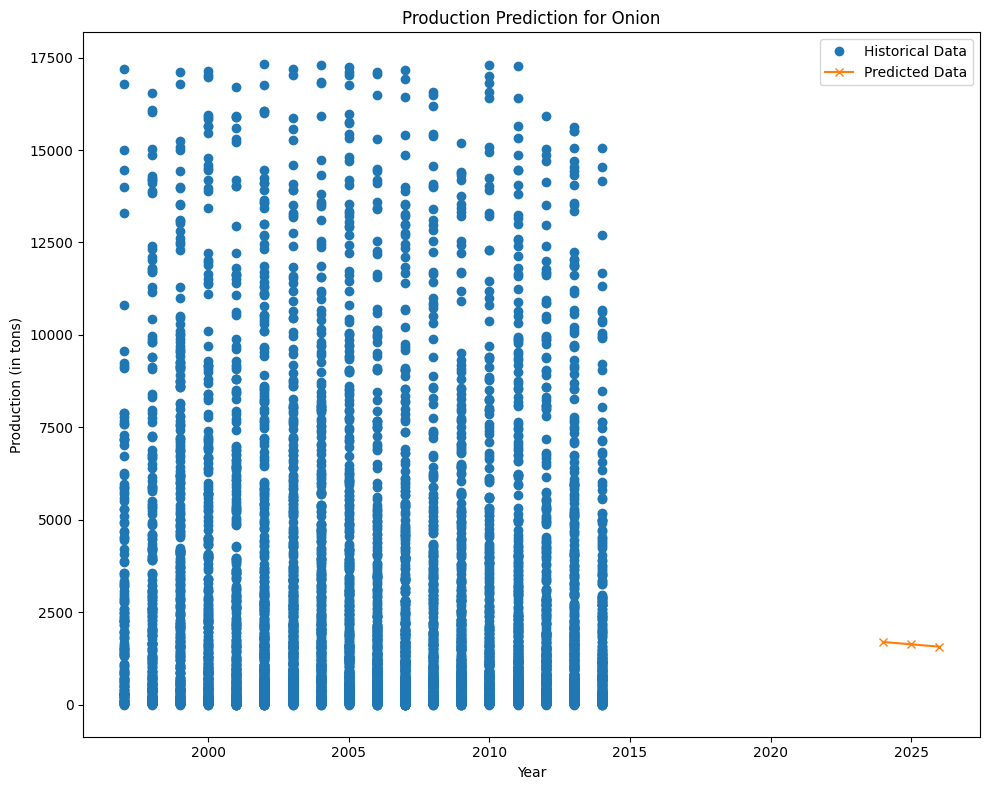

Displayng plot: For Sugarcane
Predictions: [4442.47207773 4431.12981108 4419.78754444]


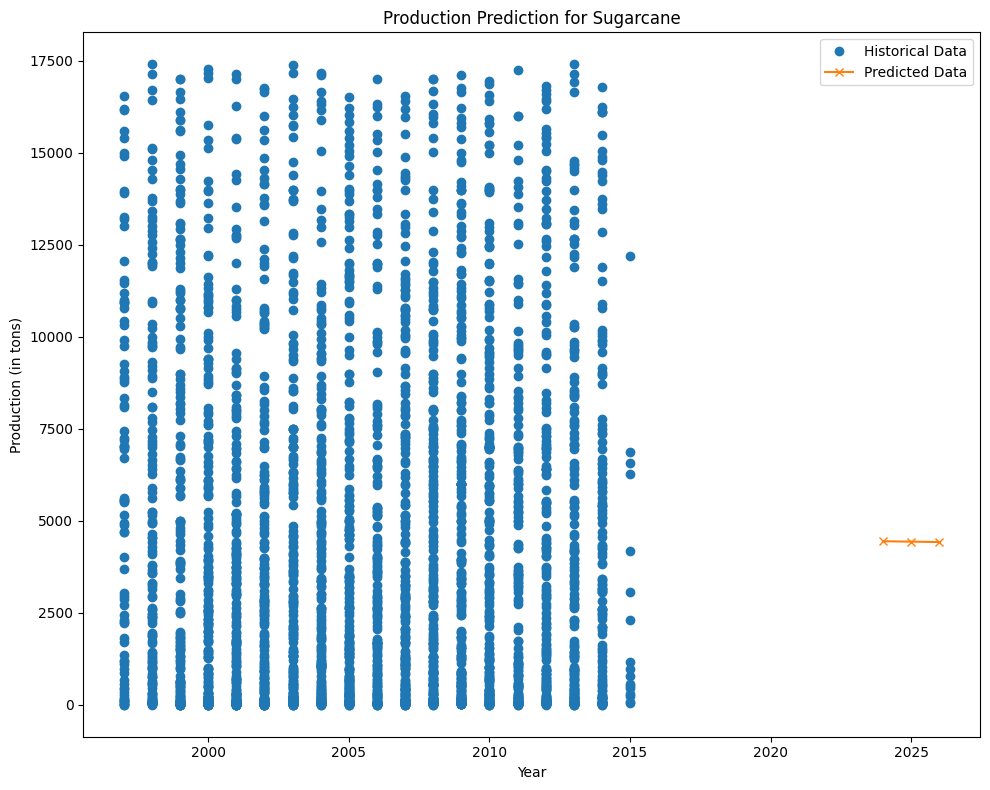

Displayng plot: For Groundnut
Predictions: [1852.72291776 1845.27687227 1837.83082677]


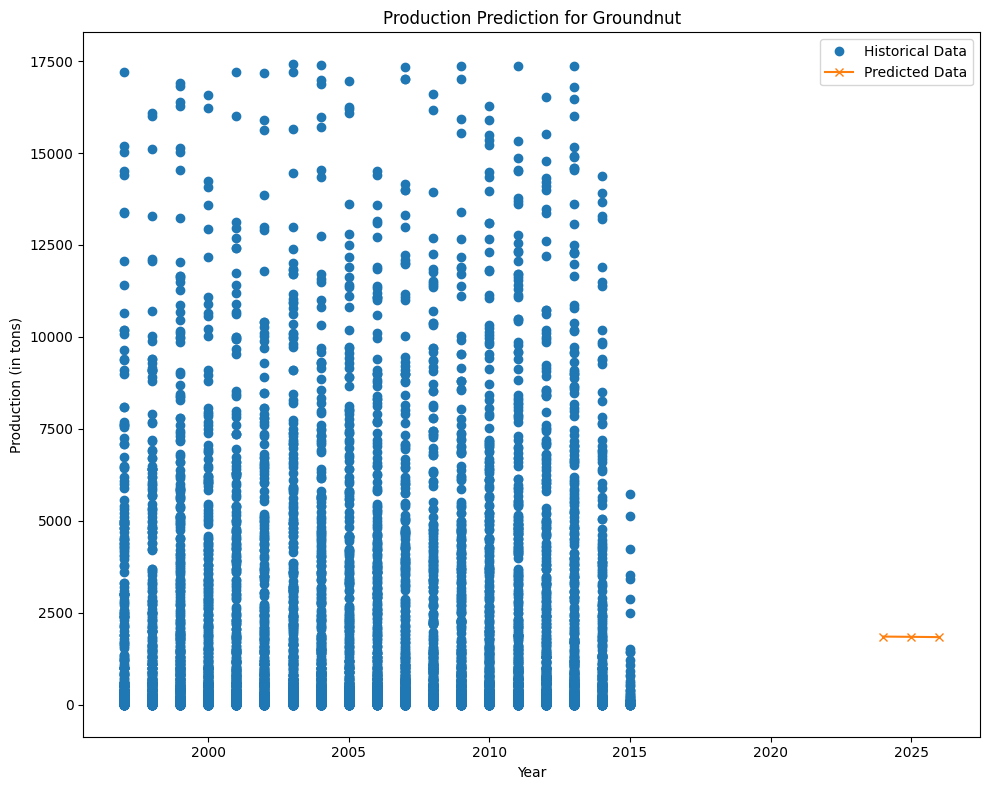

Displayng plot: For Jowar
Predictions: [2439.08104278 2458.60911921 2478.13719564]


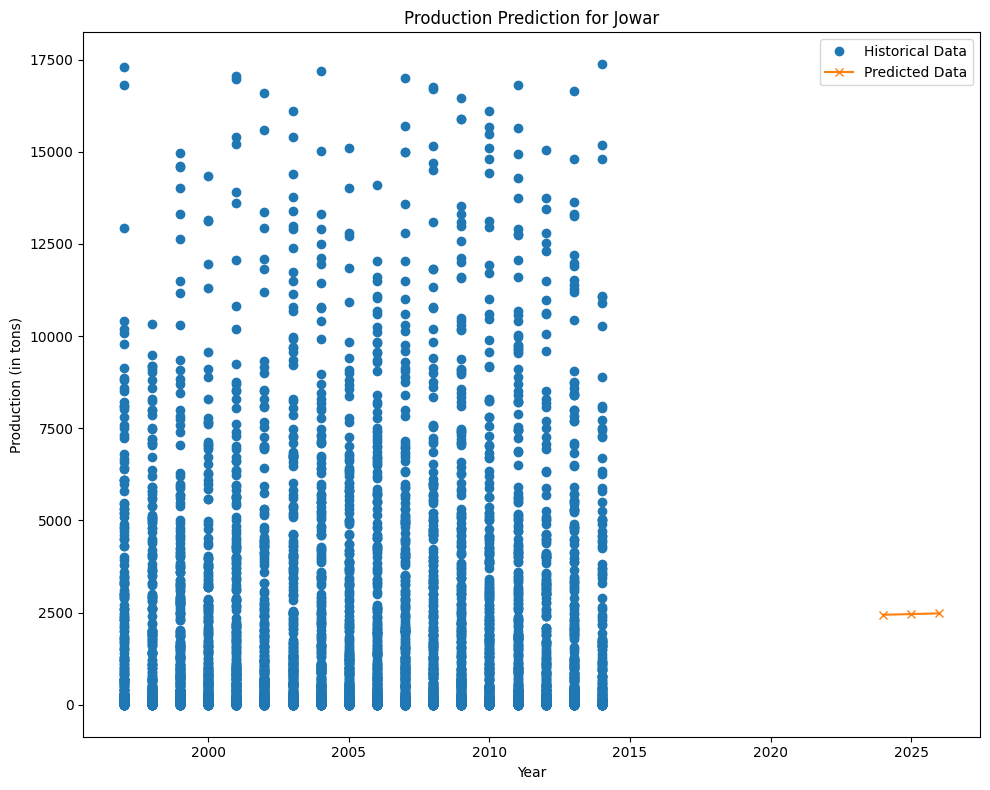

Displayng plot: For Barley
Predictions: [1487.93079163 1422.51722079 1357.10364996]


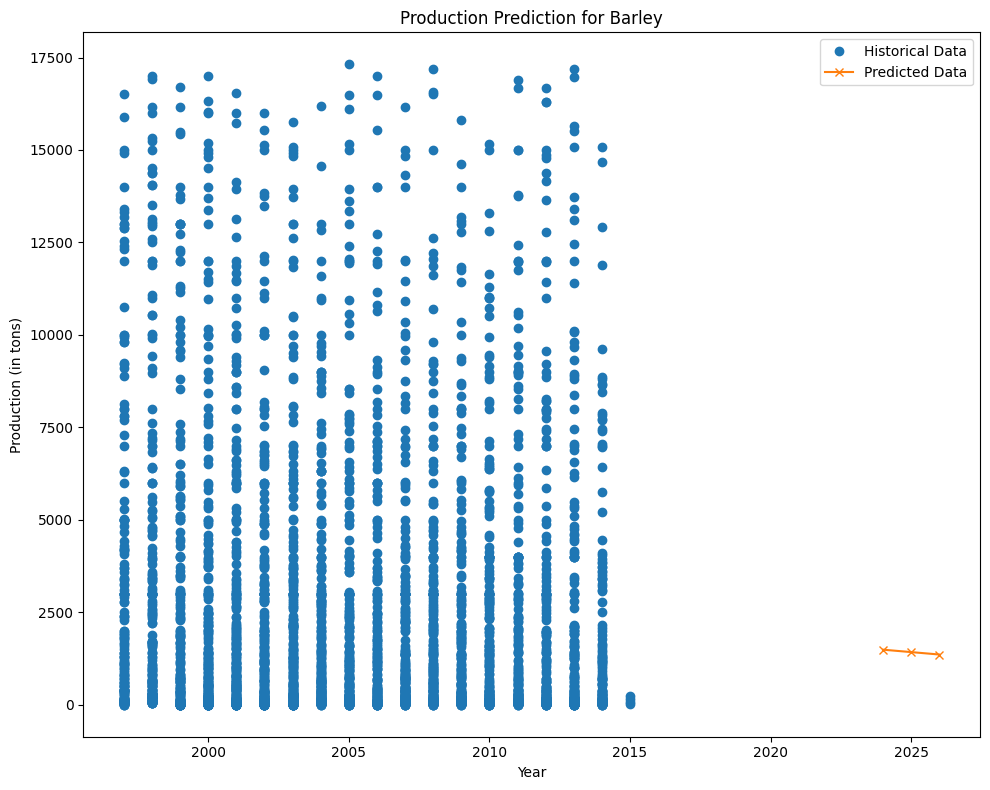

Displayng plot: For Rapeseed &Mustard
Predictions: [2197.83772634 2227.02541918 2256.21311203]


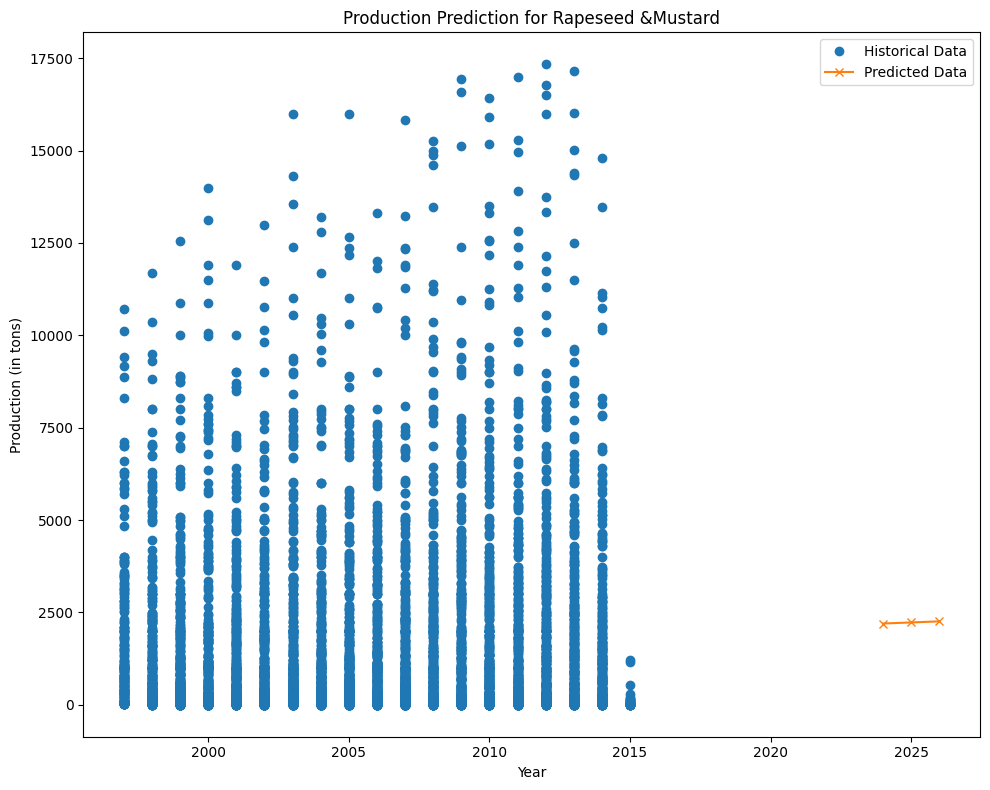

Displayng plot: For Arhar/Tur
Predictions: [1110.55774179 1089.91022549 1069.2627092 ]


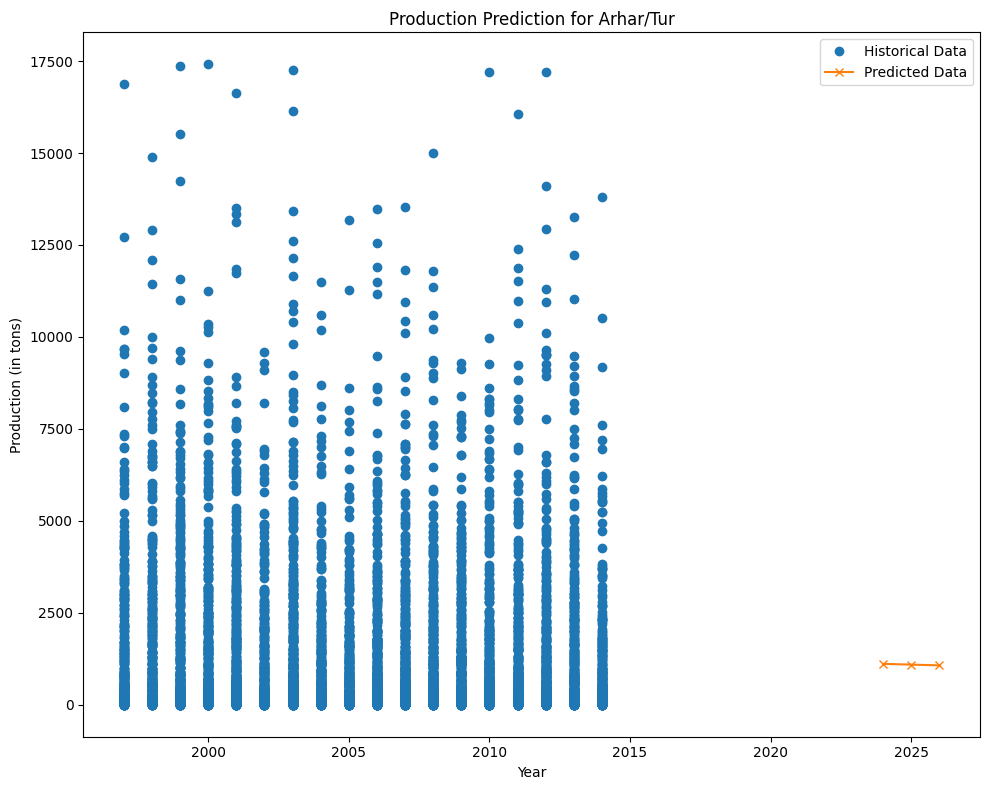

In [13]:
for crop in top_10_crops:
    filtered_data = cpd[cpd["Crop"] == crop]
    X = filtered_data[["Crop_Year"]].values
    Y = filtered_data["Production"].values
    model = LinearRegression()
    model.fit(X, Y)
    future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
    predictions = model.predict(future_years)
    plt.figure(figsize=(10, 8))
    plt.plot(
        filtered_data["Crop_Year"],
        filtered_data["Production"],
        "o",
        label="Historical Data",
    )
    plt.plot(future_years, predictions, "x-", label="Predicted Data")
    plt.title(f"Production Prediction for {crop}")
    plt.xlabel("Year")
    plt.ylabel("Production (in tons)")
    plt.legend()
    plt.tight_layout()
    print(f"Displayng plot: For {crop}\nPredictions: {predictions}")
    plt.show()